TOURISM EXPERIENCE ANALYTICS - DATA EXPLORATION

STEP 1: DETECTING CORRECT FILE PATHS
--------------------------------------------------
Current working directory: d:\Tourism-Analytics\notebooks
✗ Not found at: data/raw/
✓ Found data files at: ../data/raw/
Using path: ../data/raw/

STEP 2: FILE EXISTENCE CHECK
--------------------------------------------------
✓ transactions: ../data/raw/Transaction.xlsx
✓ users: ../data/raw/User.xlsx
✓ items: ../data/raw/Updated_Item.xlsx
✓ cities: ../data/raw/City.xlsx
✓ countries: ../data/raw/Country.xlsx
✓ regions: ../data/raw/Region.xlsx
✓ continents: ../data/raw/Continent.xlsx
✓ attraction_types: ../data/raw/Type.xlsx
✓ visit_modes: ../data/raw/Mode.xlsx

STEP 3: LOADING DATASETS
--------------------------------------------------
✓ transactions: 52,930 rows × 7 columns
✓ users: 33,530 rows × 5 columns
✓ items: 1,698 rows × 5 columns
✓ cities: 9,143 rows × 3 columns
✓ countries: 165 rows × 3 columns
✓ regions: 22 rows × 3 columns
✓ continents: 6 r

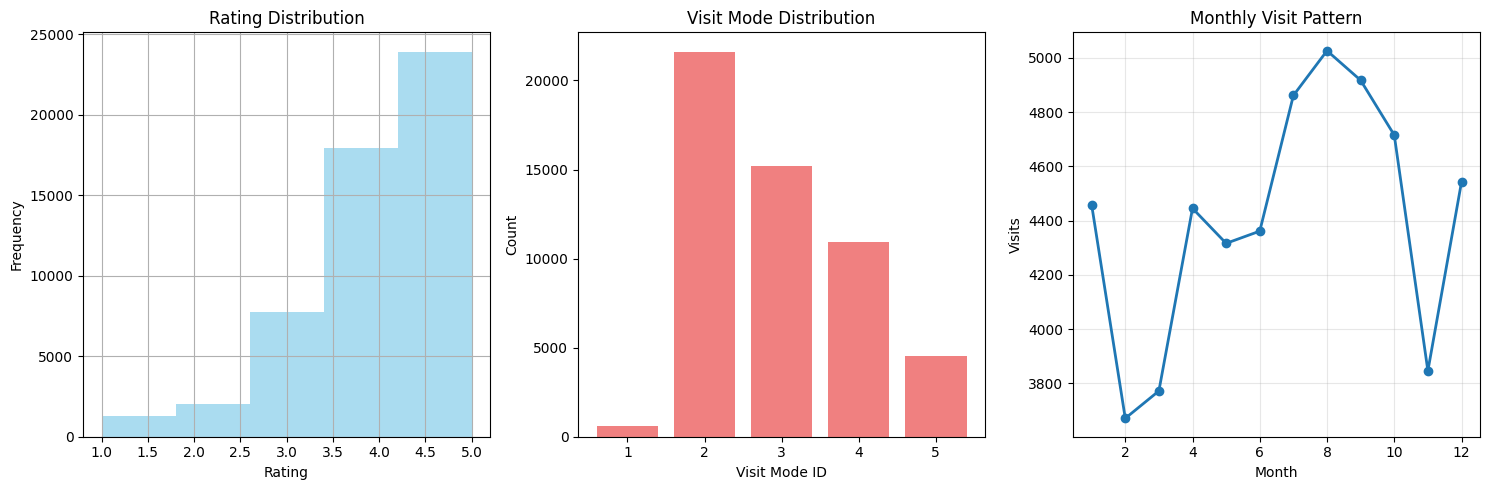

✓ Quick visualizations saved as 'quick_data_overview.png'

QUICK DATA QUALITY CHECK:
  Duplicates: 0
  Invalid ratings: 0
  Missing values: 0
  Data quality: ✓ GOOD

✅ DATA EXPLORATION SUCCESSFUL!
✓ Loaded 9 datasets successfully
✓ Ready to proceed with detailed analysis
✓ Next step: Data Cleaning and Preprocessing



In [4]:
# Tourism Experience Analytics - Data Exploration (Path Auto-Detection)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
plt.style.use('default')

print("=" * 70)
print("TOURISM EXPERIENCE ANALYTICS - DATA EXPLORATION")
print("=" * 70)

# =============================================================================
# AUTOMATIC PATH DETECTION AND CORRECTION
# =============================================================================

print("\nSTEP 1: DETECTING CORRECT FILE PATHS")
print("-" * 50)

# Check current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Try different possible paths
possible_paths = [
    'data/raw/',           # If running from project root
    '../data/raw/',        # If running from notebooks folder  
    '../../data/raw/',     # If running from deeper subfolder
    'data\\raw\\',         # Windows paths from root
    '..\\data\\raw\\',     # Windows paths from notebooks
]

correct_path = None
for path in possible_paths:
    test_file = path + 'Transaction.xlsx'
    if os.path.exists(test_file):
        correct_path = path
        print(f"✓ Found data files at: {correct_path}")
        break
    else:
        print(f"✗ Not found at: {path}")

if correct_path is None:
    print("\n❌ Could not locate data files automatically.")
    print("Please run this code to help locate your files:")
    print("""
# Manual file location finder
import os
for root, dirs, files in os.walk('.'):
    for file in files:
        if file == 'Transaction.xlsx':
            print(f"Found Transaction.xlsx at: {os.path.join(root, file)}")
    for root, dirs, files in os.walk('..'):
        for file in files:
            if file == 'Transaction.xlsx':
                print(f"Found Transaction.xlsx at: {os.path.join(root, file)}")
    """)
else:
    print(f"Using path: {correct_path}")

# Define file paths with auto-detected base path
file_paths = {
    'transactions': correct_path + 'Transaction.xlsx',
    'users': correct_path + 'User.xlsx', 
    'items': correct_path + 'Updated_Item.xlsx',
    'cities': correct_path + 'City.xlsx',
    'countries': correct_path + 'Country.xlsx',
    'regions': correct_path + 'Region.xlsx',
    'continents': correct_path + 'Continent.xlsx',
    'attraction_types': correct_path + 'Type.xlsx',
    'visit_modes': correct_path + 'Mode.xlsx'
}

# =============================================================================
# FILE EXISTENCE CHECK AND LOADING
# =============================================================================

print("\nSTEP 2: FILE EXISTENCE CHECK")
print("-" * 50)

missing_files = []
for name, path in file_paths.items():
    exists = os.path.exists(path)
    print(f"{'✓' if exists else '❌'} {name}: {path}")
    if not exists:
        missing_files.append(name)

if correct_path and missing_files:
    print(f"\n⚠️ Found correct directory but missing {len(missing_files)} files:")
    for file in missing_files:
        print(f"   • {file}")

# Load datasets
datasets = {}
load_errors = {}

print(f"\nSTEP 3: LOADING DATASETS")
print("-" * 50)

if correct_path:
    for name, path in file_paths.items():
        try:
            if os.path.exists(path):
                df = pd.read_excel(path)
                datasets[name] = df
                print(f"✓ {name}: {df.shape[0]:,} rows × {df.shape[1]} columns")
            else:
                load_errors[name] = "File not found"
                print(f"❌ {name}: File not found")
        except Exception as e:
            load_errors[name] = str(e)
            print(f"❌ {name}: {str(e)}")
else:
    print("❌ Cannot load datasets - path not detected")

print(f"\nLoading Summary: {len(datasets)}/{len(file_paths)} datasets loaded successfully")

# =============================================================================
# BASIC ANALYSIS (If data is loaded)
# =============================================================================

if len(datasets) > 0:
    print("\nSTEP 4: BASIC DATASET OVERVIEW")
    print("-" * 50)
    
    overview_data = []
    for name, df in datasets.items():
        overview_data.append({
            'Dataset': name.replace('_', ' ').title(),
            'Rows': f"{df.shape[0]:,}",
            'Columns': df.shape[1],
            'Memory (MB)': f"{df.memory_usage(deep=True).sum() / 1024**2:.2f}"
        })
    
    overview_df = pd.DataFrame(overview_data)
    print(overview_df.to_string(index=False))
    
    # Quick transaction analysis if available
    if 'transactions' in datasets:
        trans_df = datasets['transactions']
        print(f"\nTRANSACTION DATA QUICK ANALYSIS:")
        print(f"  Time period: {trans_df['VisitYear'].min()}-{trans_df['VisitYear'].max()}")
        print(f"  Unique users: {trans_df['UserId'].nunique():,}")
        print(f"  Unique attractions: {trans_df['AttractionId'].nunique():,}")
        print(f"  Average rating: {trans_df['Rating'].mean():.2f}")
        
        # Quick visualization
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 3, 1)
        trans_df['Rating'].hist(bins=5, alpha=0.7, color='skyblue')
        plt.title('Rating Distribution')
        plt.xlabel('Rating')
        plt.ylabel('Frequency')
        
        plt.subplot(1, 3, 2)
        visit_mode_counts = trans_df['VisitMode'].value_counts()
        plt.bar(visit_mode_counts.index, visit_mode_counts.values, color='lightcoral')
        plt.title('Visit Mode Distribution')
        plt.xlabel('Visit Mode ID')
        plt.ylabel('Count')
        
        plt.subplot(1, 3, 3)
        monthly_counts = trans_df['VisitMonth'].value_counts().sort_index()
        plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linewidth=2)
        plt.title('Monthly Visit Pattern')
        plt.xlabel('Month')
        plt.ylabel('Visits')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('quick_data_overview.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("✓ Quick visualizations saved as 'quick_data_overview.png'")
    
    # Data quality quick check
    if 'transactions' in datasets:
        print(f"\nQUICK DATA QUALITY CHECK:")
        trans_df = datasets['transactions']
        
        duplicates = trans_df.duplicated().sum()
        print(f"  Duplicates: {duplicates}")
        
        invalid_ratings = len(trans_df[(trans_df['Rating'] < 1) | (trans_df['Rating'] > 5)])
        print(f"  Invalid ratings: {invalid_ratings}")
        
        missing_values = trans_df.isnull().sum().sum()
        print(f"  Missing values: {missing_values}")
        
        print(f"  Data quality: {'✓ GOOD' if duplicates == 0 and invalid_ratings == 0 else '⚠️ NEEDS ATTENTION'}")

# =============================================================================
# TROUBLESHOOTING HELP
# =============================================================================

if len(datasets) == 0:
    print("\n" + "="*70)
    print("TROUBLESHOOTING HELP")
    print("="*70)
    
    print("\nThe notebook cannot find your data files. Here's how to fix it:")
    print("\n1. CHECK FILE LOCATIONS:")
    print("   Run this code to find where your files actually are:")
    print("""
   import os
   # Search for Transaction.xlsx
   for root, dirs, files in os.walk('.'):
       for file in files:
           if file.endswith('.xlsx'):
               print(f"Found: {os.path.join(root, file)}")
   """)
    
    print("\n2. VERIFY FILE NAMES:")
    print("   Make sure your files are named exactly:")
    print("   • Transaction.xlsx")
    print("   • User.xlsx") 
    print("   • Updated_Item.xlsx")
    print("   • City.xlsx")
    print("   • Country.xlsx")
    print("   • Region.xlsx")
    print("   • Continent.xlsx")
    print("   • Type.xlsx")
    print("   • Mode.xlsx")
    
    print("\n3. CHECK FOLDER STRUCTURE:")
    print("   Your structure should be:")
    print("   project-folder/")
    print("   ├── data/")
    print("   │   └── raw/")
    print("   │       └── [all xlsx files here]")
    print("   └── notebooks/")
    print("       └── 01_data_exploration.ipynb")
    
    print("\n4. ALTERNATIVE - MANUAL PATH:")
    print("   If the auto-detection fails, manually set the path:")
    print("   correct_path = 'your/actual/path/to/data/raw/'")

else:
    print("\n" + "="*70)
    print("✅ DATA EXPLORATION SUCCESSFUL!")
    print("="*70)
    print(f"✓ Loaded {len(datasets)} datasets successfully")
    print(f"✓ Ready to proceed with detailed analysis")
    print(f"✓ Next step: Data Cleaning and Preprocessing")

print("\n" + "="*70)